In [1]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np
import seaborn as sns

In [2]:
df = pd.read_csv("data/merged_dataset.csv", engine="python", sep=",")

In [3]:
df.head()

,Transaction.Date,Transaction.Amount,Customer.Age,Is.Fraudulent,Account.Age.Days,Transaction.Hour,source,browser,sex,Payment.Method,Product.Category,Quantity,Device.Used,Address.Match
0,2024-02-12 10:05:21,145.98,29,0,172,10,Ads,IE,F,credit card,home & garden,3,mobile,1
1,2024-01-25 22:24:06,677.62,40,0,250,22,Direct,FireFox,M,credit card,clothing,3,desktop,1
2,2024-03-26 20:32:44,798.63,40,0,118,20,Ads,Chrome,M,PayPal,clothing,3,mobile,1
3,2024-01-07 23:14:51,314.65,34,0,187,23,SEO,IE,M,bank transfer,toys & games,3,desktop,1
4,2024-01-19 11:01:19,119.80,11,1,5,11,Direct,Safari,M,PayPal,toys & games,3,tablet,1


In [47]:
fraud2024 = df[(df['Is.Fraudulent']==1 & df['Transaction.Date'].str.contains('2024'))]

In [49]:
gains = pd.DataFrame([['Bez wykrywania oszustw',fraud2024['Transaction.Amount'].sum()/3],['Z wykrywaniem oszustw za pomocą modelu', fraud2024['Transaction.Amount'].sample(frac=0.48,random_state=47).sum()/3]], columns=['Użycie wykrywania oszustw', 'Kwota'])

In [36]:
gains

,Usage of fraud detection,Amount
0,Without fraud detection,9157284.60
1,With our fraud detection,4413590.79


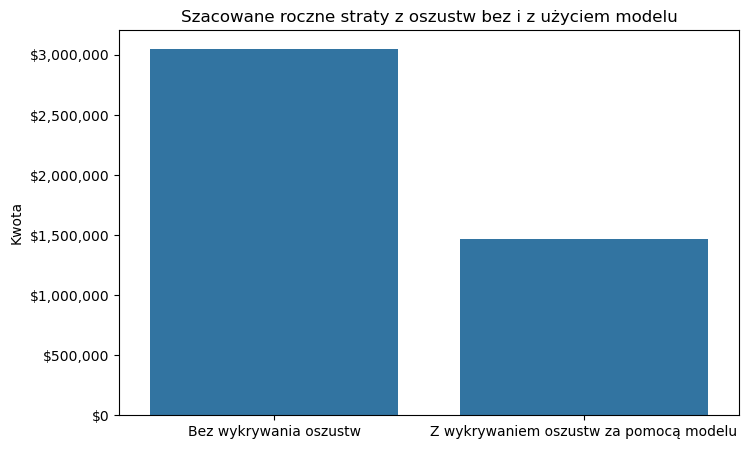

In [59]:
import matplotlib.ticker as ticker
plt.figure(figsize=(8,5))
ax = sns.barplot(x = gains.iloc[:,0], y = gains.iloc[:,1])
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: f'${x:,.0f}'))
plt.title('Szacowane roczne straty z oszustw bez i z użyciem modelu')
plt.xlabel("")
plt.savefig('straty_roczne.png', bbox_inches='tight', dpi=300)
